# Overview

### Has the network latency gone up since we switched internet service providers?

$H_0:$  Mean latency in the three months after switiching internet service providers is less than or equal to mean latency in the three months before internet service providers. 

$H_a:$ Mean latency in the three months after switching internet service providers is greater than mean latency in the three months before switching internet service providers.

**Type I Error**: To test this hypothesis, we sampled a group of people. Within our sample group, average latency for three months after switching internet service providers is greater than latency for three months before switching internet service providers, but the overall population experienced a decrease or no change in latency after switching internet service providers.

**Type II Error**: To test our hypothesis, we sampled a group of people. Within our sample group, average latency for three months after switching internet service providers is less than the average latency for three months before switching internet service providers. The overall population, however, experienced an average increase in latency after switching internet service providers. 

### Is the website redesign any good?

$H_0:$ The mean click-through rate in the six months before the website redesign is equal to or greater than the mean click-through rate in the six months after the website redesign.

$H_a:$ The mean click-through rate in the six months before the website redesign is less than the mean click-through rate in the six months after the website redesign. 

**Type I Error**: To sample our hypothesis, we sampled the website's mean click rates for users in a set number of areas. Of the areas we sampled, the mean click through rate for the six months before the website redesign was less than the mean click through rate for the six months after the website redesign. However, the mean click rate of users in all areas shows an increase in the click through rate since the website redesign. 

**Type II Error**: To sample our hypothesis, we sampled the website's mean click rate for a set number of areas. Of the areas we sampled, the mean click through rate for the six months before the website redesign was greater than the click through rate for the six months after the website redesign. However, the mean click rate of all days shows no change in the click through rate since website redesign. 

### Is our television ad driving more sales?


$H_0:$ The mean sales rate in the six months before the television advertisement campaign began is greater than or equal to the mean sales rate in the six months after the television campaign began. 

$H_{a}:$ The mean sales rate in the six months before the television advertisement campaign began is less than the mean sales rate in the six months after the television campaign began. 

**Type I Error**: To test this hypothesis we sampled sales figures for a six month period in a set number of locations. In the sampled locations, the mean number of sales in the six months before the television advertising campaign began was less than the mean number of sales in the six months after the television advertising campaign began. 

However, in the whole market, sales rates remained the same after the television advertising campaign began. 

**Type II Error**: To test this hypothesis, we sampled the sales figures in a set number of locations. In the sampled locations, the mean number of sales in the six months before the television advertising campaign began was greater than the mean number of sales in the six months after the television advertising campaign began. 

However, in the whole market, sales decreased after the television advertising campaign began.

# T-test

We will import the datasets that we may need.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from pydataset import data
from numpy import random
import seaborn as sns
import pandas as pd
from math import sqrt

## Question #1 

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.

A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.

In [16]:
sample_size1 = 40
mean1 = 90
std1 = 15

A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days.

In [17]:
sample_size2 = 50
mean2 = 100
std2 = 20

Use a .05 level of significance.

In [18]:
level_of_significance = 0.05

**Formulate Hypotheses**

$H_0$: Average home sale time for Office #1 = average home sale time for Office #2.

$H_a$: Average home sale time for Office #1 $\ne$ average home sale time for Office #2.

**Generate a sample for Office #1**

In [19]:
office_1 = random.normal(mean1, std1, size= sample_size1)
office_1_pd = pd.DataFrame({'time': office_1})
office_1_pd

,time
0,86.863019
1,65.662413
2,90.034150
3,109.155738
4,97.453487
5,110.480642
6,76.590429
7,66.374976
8,83.929814
9,92.131281


**Generate a sample for Office #2**

In [20]:
office_2 = random.normal(mean2, std2, size = sample_size2)
office_2_pd = pd.DataFrame({'time': office_2})
office_2_pd

,time
0,98.775402
1,75.231021
2,73.135666
3,112.138029
4,128.310492
5,87.024644
6,123.282479
7,116.107620
8,84.899523
9,122.848287


**Graph of Office #1 sale times**

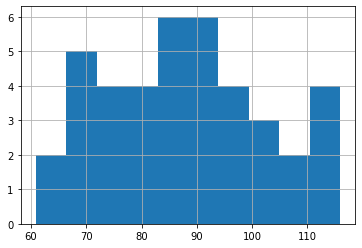

In [21]:
office_1_plot = office_1_pd['time'].hist()

**Graph of Office #2 sale times**

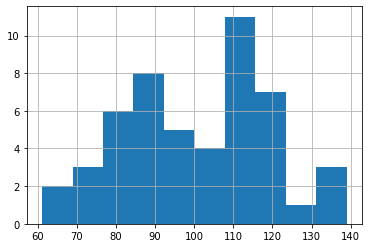

In [22]:
office_2_plot = office_2_pd['time'].hist()

These graphs look different to the eye, but we will still do a calculation to determine if there is a statistical difference.

**Check the variance**

In [23]:
print("Variance for Office 1:", office_1_pd['time'].var())
print("Variance for Office 2:", office_2_pd['time'].var())

Variance for Office 1: 218.92939583883265
Variance for Office 2: 362.11573540419494


These two variances are not equal, so we will set the argument of equal_var to False.

**Compute test statistic**

In [24]:
t, p = stats.ttest_ind(office_1_pd['time'], office_2_pd['time'], equal_var = False)
print("T-statistic:", t)
print("P-value:", p)

T-statistic: -3.7273568083251125
P-value: 0.00034166361072268897


We will now check whether $\frac{1}{2}p < 0.05$ and $t>0$.

In [25]:
print("Is p-value significant?", p < level_of_significance)
print("Is t-statistic greater than 0?", t > 0)

Is p-value significant? True
Is t-statistic greater than 0? False


**We will use the p-value and t-statistic to reach a conclusion.**

In [26]:
if p > level_of_significance:
    print("We fail to reject the null hypothesis")
else:
    print("We reject the null hypothesis.")
    print("The average sale time for Office #1 is not equal to the average sale time for Office #2.")

We reject the null hypothesis.
The average sale time for Office #1 is not equal to the average sale time for Office #2.


## Question 2

Load the mpg dataset.

In [27]:
mpg_df = data("mpg")

In [28]:
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


### Part 1

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

**Formulate fuel hypotheses**

$H_{0}:$ Average fuel efficiency in cars from 2008 = average fuel efficiency in cars from 1999. 

$H_{a}:$ Average fuel efficiency in cars from 2008 $\ne$ average fuel efficiency in cars from 1999. 

**Get data**

We will make a new column averaging the city mileage and highway mileage.

In [29]:
mpg_df["avg_mpg"] = (mpg_df.cty + mpg_df.hwy)/2
mpg_df

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


Now we can use this new column to compare mileages for 2008 and 1999 cars.

In [30]:
cars_2008_sample = mpg_df[mpg_df.year==2008].avg_mpg

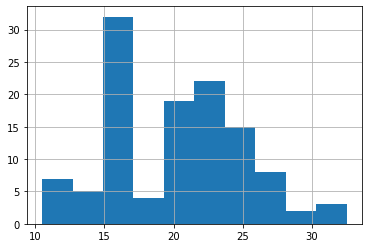

In [31]:
cars_2008_chart = cars_2008_sample.hist()

In [32]:
cars_1999_sample = mpg_df[mpg_df.year==1999].avg_mpg

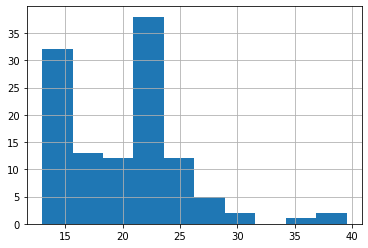

In [33]:
cars_1999_chart = cars_1999_sample.hist()

In [34]:
cars_2008_sample.mean()

20.076923076923077

In [35]:
cars_1999_sample.mean()

20.22222222222222

In [36]:
cars_2008_sample.size

117

In [37]:
cars_1999_sample.size

117

**Set alpha**

In [38]:
alpha = 0.05

**Verify Assumptions**

1. Independent Samples  YES! no observations in the 2008 sample exist in the 1999 sample.
2. Normal Distribution, or at least 30 observations and "kinda" normal.  Plenty of observations, 177 for each. 
3. Equal Variances (we have a method for dealing with unequal variances).

In [39]:
print("Variance for 2008 cars sample:", cars_2008_sample.var())
print("Variance for 1999 cars sample:", cars_1999_sample.var())

Variance for 2008 cars sample: 24.097480106100797
Variance for 1999 cars sample: 27.122605363984682


In [70]:
stats.levene(cars_2008_sample, cars_1999_sample)

LeveneResult(statistic=0.033228136671080453, pvalue=0.855517569468803)

Because the p-value is greater than 0.05, we conclude that these two variances are equal.

**Compute test statistic**

In [71]:
t, p = stats.ttest_ind(cars_2008_sample, cars_1999_sample)
print("T-statistic:", t)
print("P-value:", p)

T-statistic: -0.21960177245940962
P-value: 0.8263744040323578


**Make a conclusion based on the data**

In [72]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  False
is t > 0?  False


In [73]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

We fail to reject the null hypothesis.


We have high confidence that the mean mpg for cars built in 2008 is equal to the mean mpg for cars built in 1999.

### Part 2

Are compact cars more efficient than the average car?

**Formatulate the hypotheses**

$H_{0}:$ Average miles per gallon for compact cars >= average miles per gallon for all cars. 

$H_{a}:$ Average miles per gallon for compact cars > average miles per gallon for all cars.

**Get data**

We will make a new dataframe with just compact cars.

In [43]:
compact_cars = mpg_df[mpg_df["class"] == "compact"]

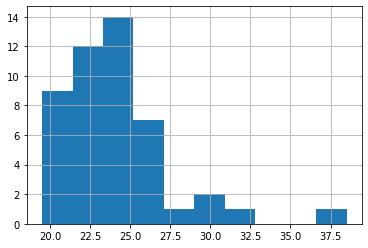

In [44]:
compact_cars_mileage = compact_cars.avg_mpg.hist()

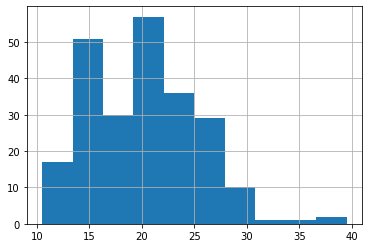

In [45]:
overall_mileage = mpg_df.avg_mpg.hist()

**Set alpha**

In [46]:
alpha = 0.05

**Verify Assumptions**

In [47]:
compact_cars.size

564

In [48]:
mpg_df.size

2808

The sizes of both dataframe as large enough for us to assume normality.

In [49]:
mean_for_all_cars = mpg_df.avg_mpg.mean()
mean_for_all_cars

20.14957264957265

**Compute p value and test statistic**

In [50]:
t, p = stats.ttest_1samp(compact_cars.avg_mpg, mean_for_all_cars)
print("T statistic:", t)
print("p-value:", p/2)
print("alpha:", alpha)

T statistic: 7.896888573132535
p-value: 2.0992818971585668e-10
alpha: 0.05


**We will make a conclusion based on our data**

In [51]:
print("Is p-value significant?", p/2 < alpha)
print("Is t-statistic greater than 0?", t > 0)

Is p-value significant? True
Is t-statistic greater than 0? True


Is $\frac{1}{2} p < \alpha$ and $t > 0$? 

Is $t > 0$ and $\frac{1}{2}p < \alpha$?

In [52]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis.")
    print("In fact, the mpg of compact cars is less than the average mpg of all cars.")
else:
    print("We reject $H_{0}.")
    print("The fuel efficiency of compact cars is likely better than the average fuel efficiency for all cars.")

We reject $H_{0}.
The fuel efficiency of compact cars is likely better than the average fuel efficiency for all cars.


We have high confidence that the mean miles per gallon of compact cars is greater than the mean miles per gallon of all cars. 

### Part 3

Do manual cars get better gas mileage than automatic cars?

**Format the hypotheses**

$H_{0}:$ The average miles per gallon of manual cars is less than or equal to the average miles per gallon of automatic cars. 

$H_{a}:$ The average miles per gallon of manual cars is greater than the average miles per gallon of automatic cars.

**Get data**

In [53]:
auto_cars = mpg_df['trans'].str.startswith('a')

In [54]:
manual_cars = mpg_df['trans'].str.startswith('m')

In [55]:
automatic = mpg_df[auto_cars]

In [56]:
manual = mpg_df[manual_cars]

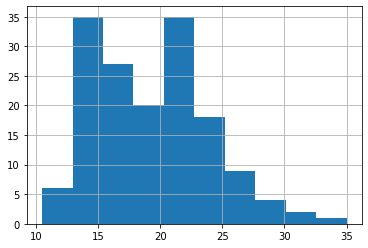

In [57]:
automatic_historgram = automatic.avg_mpg.hist()

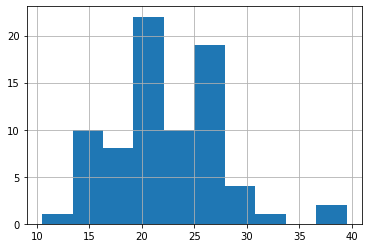

In [58]:
manual_histogram = manual.avg_mpg.hist()

**Set alpha**

In [59]:
alpha = 0.05

**Verify assumptions**

In [60]:
automatic.size

1884

In [61]:
manual.size

924

1. Independent Samples. No observations in the automatic sample exist in the manual sample. 

2. Both of our data sets are large enough for us to assume normality.

3. Equal Variances (we have an argument that can handle unequal variances).

In [64]:
print("Variance for automaitc sample:", automatic.avg_mpg.var())
print("Variance for manual sample:", manual.avg_mpg.var())

Variance for automaitc sample: 21.942777233382337
Variance for manual sample: 26.635167464114826


In [65]:
stats.levene(automatic.avg_mpg, manual.avg_mpg)

LeveneResult(statistic=0.20075824847529639, pvalue=0.6545276355131857)

Because the resulting p-value is greater than 0.05, we conclude that these two variances ar equal.

**Compute test statistic and p value**

In [66]:
t, p = stats.ttest_ind(manual.avg_mpg, automatic.avg_mpg)

In [67]:
print("T-statistic:", t)
print("P-value:", p/2)

T-statistic: 4.593437735750014
P-value: 3.5771872005728416e-06


**Reach conclusion**

In [68]:
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


In [69]:
if p/2 > alpha:
    print("We fail to reject the null hypothesis.")
elif t < 0:
    print("We fail to reject the null hypothesis.")
else:
    print("We reject the null hypothesis.")

We reject the null hypothesis.


We have high confidence that the average miles per gallon for manual cars is greater than the average miles per gallon of automatic cars.

# Correlation

## Part 1

Use the telco_churn data.

In [81]:
telco = pd.read_csv("Cust_Churn_Telco.csv")

In [31]:
telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


### Does tenure correlate with monthly charges?

**Preset Values** 

In [82]:
n = telco.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
alpha = 1 - conf_interval

**Set x and y**

In [83]:
x = telco.tenure
y = telco.MonthlyCharges

**Plot x and y**

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

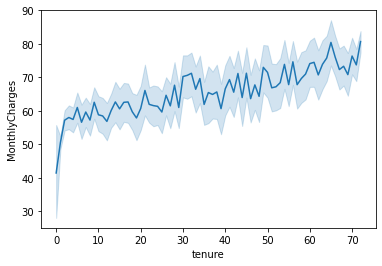

In [88]:
sns.lineplot(data=telco, x="tenure", y="MonthlyCharges")

**Calculate correlation and p value**

In [11]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.24789985628615002, 4.0940449915016345e-99)

**Make conclusion**

In [28]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


We conclude that tenure is likely correlated with monthly charges.

### Does tenure correlate with total charges?

**Set x and y**

We set tenure and total charges greater than 0 to eliminate null values.

In [34]:
x = telco[telco.tenure > 0].tenure 
y = telco[telco.tenure > 0].TotalCharges

**Graph the values to check for correlation**

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

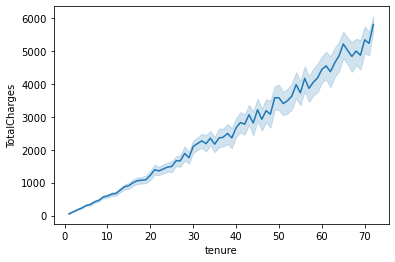

In [89]:
sns.lineplot(data=telco, x="tenure", y="TotalCharges")

**Calculate correlation and p value**

In [85]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.825880460933202, 0.0)

**Make conclusion**

In [86]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


We conclude that tenure is likely correlated with total charges.

### What happens if you control for phone and Internet Service?

First we will look at customers who have phone service.

**Set new x and y**

In [91]:
x_phone = x[telco.PhoneService == "Yes"]
y_phone = y[telco.PhoneService == "Yes"]

**Graph x and y**

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

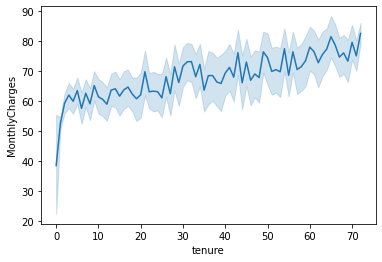

In [93]:
sns.lineplot(x=x_phone, y=y_phone)

**Calculate correlation and p value**

In [107]:
corr, p = stats.pearsonr(x_phone, y_phone)
corr, p

(0.8298393210699408, 0.0)

In [108]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


Now let's look at the correlation for customers who don't have phone service.

**Set new x and y**

In [95]:
x_no_phone = x[telco.PhoneService == "No"]
y_no_phone = y[telco.PhoneService == "No"]

**Graph x and y**

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

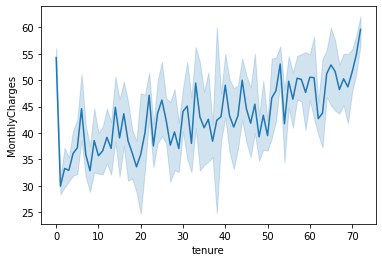

In [96]:
sns.lineplot(x=x_no_phone, y = y_no_phone)

**Calculate correlation and p value**

In [106]:
corr, p = stats.pearsonr(x_no_phone, y_no_phone)
corr, p

(0.9534228506954516, 0.0)

**Make conclusion**

In [109]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


Let's look at the correlation for DSL customers.

**Set new x and y**

In [98]:
x_dsl = x[telco.InternetService == "DSL"]
y_dsl = y[telco.InternetService == "DSL"]

**Graph x and y**

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

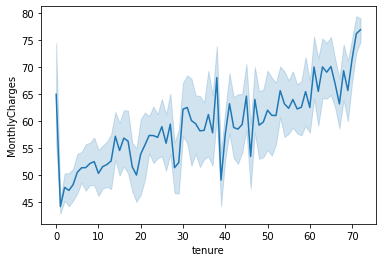

In [99]:
sns.lineplot(x=x_dsl, y=y_dsl)

**Calculate correlation and p value**

In [112]:
corr, p = stats.pearsonr(x_dsl, y_dsl)
corr, p

(0.9411848215629786, 0.0)

**Make conclusion**

In [113]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


Now we'll look at the correlation for customers who have Fiber Optic Internet Service.

**Set new x and y**

In [100]:
x_fiber = x[telco.InternetService == "Fiber optic"]
y_fiber = y[telco.InternetService == "Fiber optic"]

**Graph x and y**

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

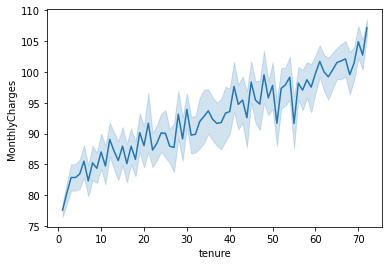

In [101]:
sns.lineplot(x=x_fiber, y=y_fiber)

**Calculate correlation and p value**

In [119]:
corr, p = stats.pearsonr(x_fiber, y_fiber)
corr, p

(0.9853093528070603, 0.0)

**Make conclusion**

In [120]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


We will now look at customers who have no internet service.

**Set x and y**

In [103]:
x_no_internet = x[telco.InternetService == "No"]
y_no_internet = y[telco.InternetService == "No"]

**Plot x and y**

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

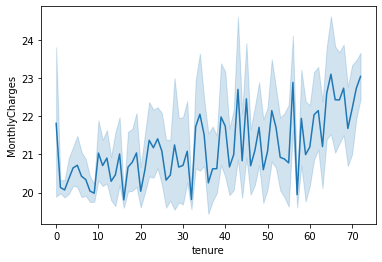

In [104]:
sns.lineplot(x_no_internet, y_no_internet)

**Calculate correlation and p value**

In [37]:
corr, p = stats.pearsonr(x_no_internet, y_no_internet)
corr, p

(0.9814648859044286, 0.0)

**Make conclusion**

In [38]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


## Part 2

In [2]:
alpha = 0.05

Use the employees database.

In [3]:
from env import host, user, password
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [4]:
employees_url = get_db_url(host, user, password, "employees")

In [5]:
sql = '''
SELECT *
FROM salaries
JOIN employees ON employees.emp_no = salaries.emp_no
'''

In [7]:
employees = pd.read_sql(sql, employees_url)

In [8]:
employees.head()

,emp_no,salary,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,60117,1986-06-26,1987-06-26,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10001,62102,1987-06-26,1988-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26
2,10001,66074,1988-06-25,1989-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26
3,10001,66596,1989-06-25,1990-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26
4,10001,66961,1990-06-25,1991-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26


### Is there a relationship between how long an employee has been with the company and their salary?

$H_0:$ There is no linear relationship between salary and how long an employee has been with the company. 

$H_a:$ There is a linear relationship between salary and how long an employee has been with the company.

In [10]:
employees['tenure'] = pd.to_datetime(employees['from_date'], errors='coerce') - pd.to_datetime(employees['hire_date'], errors='coerce')
employees.head()

,emp_no,salary,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure
0,10001,60117,1986-06-26,1987-06-26,10001,1953-09-02,Georgi,Facello,M,1986-06-26,0 days
1,10001,62102,1987-06-26,1988-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26,365 days
2,10001,66074,1988-06-25,1989-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26,730 days
3,10001,66596,1989-06-25,1990-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1095 days
4,10001,66961,1990-06-25,1991-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1460 days


In [11]:
employees['number_of_days'] = employees['tenure'].dt.days
employees.head()

,emp_no,salary,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date,tenure,number_of_days
0,10001,60117,1986-06-26,1987-06-26,10001,1953-09-02,Georgi,Facello,M,1986-06-26,0 days,0
1,10001,62102,1987-06-26,1988-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26,365 days,365
2,10001,66074,1988-06-25,1989-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26,730 days,730
3,10001,66596,1989-06-25,1990-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1095 days,1095
4,10001,66961,1990-06-25,1991-06-25,10001,1953-09-02,Georgi,Facello,M,1986-06-26,1460 days,1460


**Set x and y**

In [12]:
x = employees.number_of_days
y = employees.salary

**Test for correlation and p value**

In [13]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.3832578623317877, 0.0)

**Make conclusion**

In [14]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


We conclude that there is likely a correlation between the amount of time an employee has been at the company and his or her salary.

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

We will write a new SQL query, drawing from the titles table. 

In [15]:
from env import host, user, password
def get_db_url(host, user, password, database):
    url = f'mysql+pymysql://{user}:{password}@{host}/{database}'
    return url

In [16]:
employees_url = get_db_url(host, user, password, "employees")

In [17]:
sql2 = '''
SELECT *
FROM titles
JOIN employees ON employees.emp_no = titles.emp_no
'''

In [18]:
employees2 = pd.read_sql(sql2, employees_url)

In [19]:
employees2.head()

,emp_no,title,from_date,to_date,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,Staff,1996-08-03,9999-01-01,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,Senior Engineer,1995-12-03,9999-01-01,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,Engineer,1986-12-01,1995-12-01,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01


In [20]:
employees2 = employees2.loc[:,~employees2.columns.duplicated()]

In [21]:
employees2.head()

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,Senior Engineer,1986-06-26,9999-01-01,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,Staff,1996-08-03,9999-01-01,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,Senior Engineer,1995-12-03,9999-01-01,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,1954-05-01,Chirstian,Koblick,M,1986-12-01


In [22]:
employees_sorted_by_date = employees2.sort_values('to_date')

In [23]:
employees_sorted_by_date['to_date'].unique()

array([datetime.date(1985, 3, 1), datetime.date(1985, 3, 11),
       datetime.date(1985, 3, 20), ..., datetime.date(2002, 7, 31),
       datetime.date(2002, 8, 1), datetime.date(9999, 1, 1)], dtype=object)

This array indicates to us that our second highest date value is 2002-08-1.

In [24]:
current_date = pd.Timestamp(2002, 8, 2)
greater_than_current_date = employees2.to_date > current_date
employees2.to_date[greater_than_current_date] = current_date
employees2.head()

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date
0,10001,Senior Engineer,1986-06-26,2002-08-02 00:00:00,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,Staff,1996-08-03,2002-08-02 00:00:00,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,Senior Engineer,1995-12-03,2002-08-02 00:00:00,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10004,Senior Engineer,1995-12-01,2002-08-02 00:00:00,1954-05-01,Chirstian,Koblick,M,1986-12-01


In [25]:
employees2['tenure'] =  pd.to_datetime(employees2['to_date'], errors='coerce') - pd.to_datetime(employees2['hire_date'], errors='coerce')
employees2.head()

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,tenure
0,10001,Senior Engineer,1986-06-26,2002-08-02 00:00:00,1953-09-02,Georgi,Facello,M,1986-06-26,5881 days
1,10002,Staff,1996-08-03,2002-08-02 00:00:00,1964-06-02,Bezalel,Simmel,F,1985-11-21,6098 days
2,10003,Senior Engineer,1995-12-03,2002-08-02 00:00:00,1959-12-03,Parto,Bamford,M,1986-08-28,5818 days
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,3287 days
4,10004,Senior Engineer,1995-12-01,2002-08-02 00:00:00,1954-05-01,Chirstian,Koblick,M,1986-12-01,5723 days


In [26]:
employees2['number_of_days'] = employees2['tenure'].dt.days
employees2.head()

,emp_no,title,from_date,to_date,birth_date,first_name,last_name,gender,hire_date,tenure,number_of_days
0,10001,Senior Engineer,1986-06-26,2002-08-02 00:00:00,1953-09-02,Georgi,Facello,M,1986-06-26,5881 days,5881
1,10002,Staff,1996-08-03,2002-08-02 00:00:00,1964-06-02,Bezalel,Simmel,F,1985-11-21,6098 days,6098
2,10003,Senior Engineer,1995-12-03,2002-08-02 00:00:00,1959-12-03,Parto,Bamford,M,1986-08-28,5818 days,5818
3,10004,Engineer,1986-12-01,1995-12-01,1954-05-01,Chirstian,Koblick,M,1986-12-01,3287 days,3287
4,10004,Senior Engineer,1995-12-01,2002-08-02 00:00:00,1954-05-01,Chirstian,Koblick,M,1986-12-01,5723 days,5723


In [27]:
tenure = employees2.groupby('emp_no')['number_of_days'].max()
tenure

emp_no
10001     5881
10002     6098
10003     5818
10004     5723
10005     4707
          ... 
499995    3489
499996    4327
499997    5947
499998    3215
499999    1706
Name: number_of_days, Length: 300024, dtype: int64

In [28]:
employee_title_count = employees2.groupby("emp_no")["title"].count()
employee_title_count

emp_no
10001     1
10002     1
10003     1
10004     2
10005     2
         ..
499995    1
499996    2
499997    2
499998    2
499999    1
Name: title, Length: 300024, dtype: int64

**Hypotheses**

$H_0:$ There is no linear relationship between the amount of titles an employee has held and how long that employee has been at the company.

$H_a:$ There is linear relationship between the amount of titles an employee has held and how long that employee has been at the company.

**Set x and y**

In [29]:
x=tenure
y=employee_title_count

**Calculate correlation and p value**

In [30]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.3852473222051567, 0.0)

**Make conclusion**

In [31]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


We conclude that there is likely a correlation between how long an employee has been at a company and the amount of titles that employee has had.

## Part 3

In [46]:
alpha = 0.05

Use the sleepstudy data.

In [51]:
sleep_study = data("sleepstudy")

In [53]:
sleep_study

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


### Is there a relationship between days and reaction time?

**Set x and y**

In [54]:
x = sleep_study.Days
y = sleep_study.Reaction

**Calculate correlation and p value**

In [58]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.5352302262650253, 9.894096322214812e-15)

**Make conclusion**

In [59]:
print("Is our p-value less than our alpha?", p < alpha)

Is our p-value less than our alpha? True


We conclude that there likely is a relationship between days and reaction time. 